In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from uri_template import expand

plt.rcParams["figure.figsize"]=(20,10)

In [33]:
df = pd.read_csv("HollywoodMovies.csv")
display(df)

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Canyons,IFC,22.0,NaN,NaN,NaN,1.0,0.01,13351.0,0.06,0.14,0.19,NaN,77.21,NaN,2013
966,The Call,TriStar,43.0,66.0,NaN,NaN,2507.0,17.12,6828.0,51.87,16.70,68.57,13.0,527.48,131.69,2013
967,The English Teacher,Cinedigm Entertainment,42.0,NaN,NaN,NaN,2.0,0.01,3001.0,0.10,0.06,0.10,NaN,NaN,NaN,2013
968,John Dies at the End,Magnolia,61.0,53.0,NaN,NaN,1.0,0.01,12467.0,0.14,NaN,0.14,1.0,14.20,1.00,2013


In [34]:
df.describe()

,RottenTomatoes,AudienceScore,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
count,913.000000,907.000000,949.000000,969.000000,945.000000,970.000000,876.000000,914.000000,897.000000,896.000000,895.000000,970.000000
mean,51.707558,61.271224,2495.246575,20.620826,8562.593651,68.162544,101.237419,169.009945,56.117168,384.620100,62.223575,2010.236082
std,26.821268,16.602457,1164.223356,25.338689,10645.135565,80.409969,155.987696,227.744380,53.755914,631.666012,159.713218,1.954840
min,0.000000,19.000000,1.000000,0.010000,28.000000,0.060000,0.000000,0.100000,0.000000,2.300000,0.160000,2007.000000
25%,28.000000,49.000000,2054.000000,5.300000,3528.000000,17.565000,16.667500,38.357500,20.000000,150.020000,19.505000,2009.000000
50%,52.000000,61.000000,2798.000000,13.150000,5983.000000,40.415000,46.655000,88.180000,35.000000,254.820000,34.610000,2010.000000
75%,75.000000,74.000000,3285.000000,26.200000,9790.000000,89.252500,111.908750,202.310000,75.000000,417.987500,58.375000,2012.000000
max,99.000000,96.000000,4468.000000,207.440000,147262.000000,760.500000,2021.000000,2781.500000,300.000000,10175.850000,3373.000000,2013.000000


Find the Highest Rated "Quest" Movie: Filter the data to find movies with the "Story" type "Quest". Among these, identify the movie with the highest "AudienceScore" (not Rotten Tomatoes) and print the movie name along with its score.

In [35]:
result = df.query('Story == "Quest" or Story =="quest"').sort_values('AudienceScore',ascending=False).iloc[0]
print(f'Movie with Highest Rating is :{result['Movie']} \n Rating is :{result['AudienceScore']}')

Movie with Highest Rating is :Into the Wild 
 Rating is :90.0


Analyze Genre Frequency: Calculate the frequency of movie releases for every "Genre". Sort these frequencies in descending order and identify the specific Genre that has the highest number of releases.

In [ ]:
Genre_counts  = df['Genre'].value_counts()
print(f'{Genre_counts.idxmax()} - {Genre_counts.iloc[0]}') 

Comedy - 177


Top 5 Costliest Movies: Sort the dataset by "Budget" in descending order. Display the top 5 movies, showing only the "Movie" name and the "Budget" columns.


In [37]:
df.sort_values(by = 'Budget',ascending = False).head(5)

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.420,300.0,321.14,38.23,2007
468,Tangled,Disney,89.0,88.0,Love,Animation,3603.0,48.77,13535.0,200.82,390.97,591.794,260.0,227.61,18.76,2010
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.870,258.0,345.30,58.57,2007
710,John Carter,Buena Vista,51.0,60.0,NaN,NaN,3749.0,30.18,8050.0,73.08,211.06,284.140,250.0,113.66,12.07,2012
778,The Dark Knight Rises,Warner Bros,88.0,90.0,NaN,NaN,4404.0,160.89,36532.0,448.14,636.30,1084.440,250.0,433.78,64.36,2012


Correlation between Profitability and Ratings: Create a Scatter Plot to visualize the relationship between "Profitability" (x-axis) and "RottenTomatoes" rating (y-axis). Limit the x-axis (Profitability) to a range of 0 to 200.


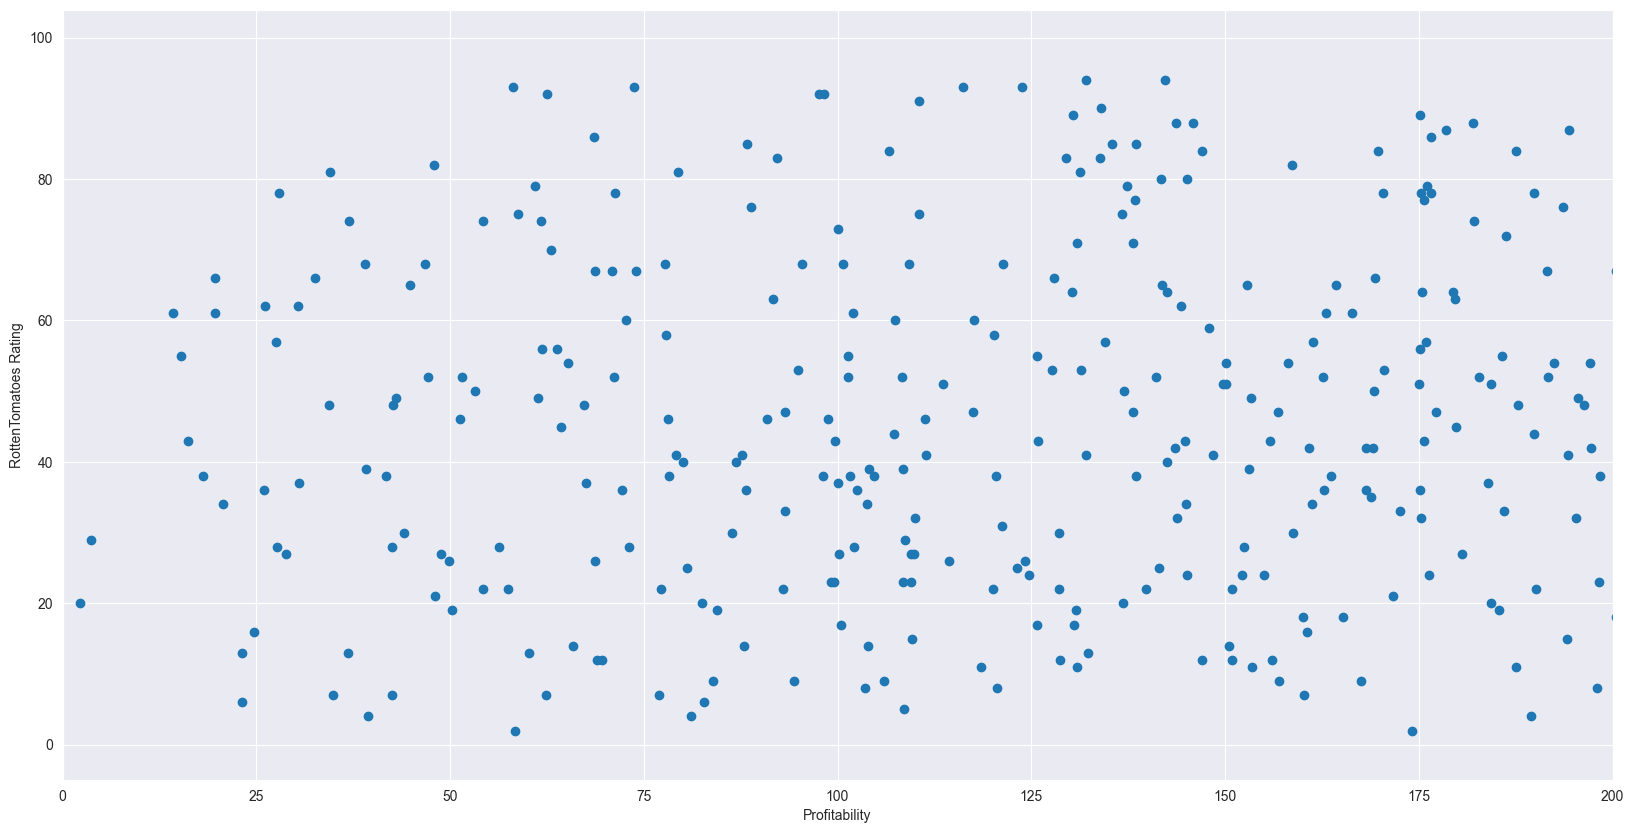

In [38]:
X = df["Profitability"]
Y = df["RottenTomatoes"]
plt.scatter(X,Y)
plt.xlabel("Profitability")
plt.ylabel("RottenTomatoes Rating")
plt.xlim([0,200])
plt.show()

Part 2: Pandas Dataframe Creation & I/O
These questions address the creation and manipulation of the example.csv file.

Dataframe Creation: Create a Pandas DataFrame from the provided raw data dictionaries (containing first_name, last_name, age, preTestScore, postTestScore) and print it.


In [39]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data)
print(df)

  first_name last_name  age preTestScore postTestScore
0      Jason    Miller   42            4        25,000
1      Molly  Jacobson   52           24        94,000
2       Tina         .   36           31            57
3       Jake    Milner   24            .            62
4        Amy     Cooze   73            .            70


CSV Export: Save the DataFrame created in the previous step to a file named example.csv.

In [40]:
df.to_csv('example.csv')

In [41]:
df = pd.read_csv('example.csv',header=None)
df

,0,1,2,3,4,5
0,NaN,first_name,last_name,age,preTestScore,postTestScore
1,0.0,Jason,Miller,42,4,"25,000"
2,1.0,Molly,Jacobson,52,24,"94,000"
3,2.0,Tina,.,36,31,57
4,3.0,Jake,Milner,24,.,62
5,4.0,Amy,Cooze,73,.,70


In [42]:
df = pd.read_csv('example.csv',index_col=['First Name','Last Name'],names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])

Boolean Null Check: Read example.csv while interpreting the character . as a missing value (NaN). Print a DataFrame of Boolean values (True/False) indicating which cells contain null values.


In [43]:
df = pd.read_csv('example.csv',na_values=['.'])
print(pd.isnull(df))

   Unnamed: 0  first_name  last_name    age  preTestScore  postTestScore
0       False       False      False  False         False          False
1       False       False      False  False         False          False
2       False       False       True  False         False          False
3       False       False      False  False          True          False
4       False       False      False  False          True          False


In [44]:
df = pd.read_csv('example.csv')
print(pd.isnull(df))

   Unnamed: 0  first_name  last_name    age  preTestScore  postTestScore
0       False       False      False  False         False          False
1       False       False      False  False         False          False
2       False       False      False  False         False          False
3       False       False      False  False         False          False
4       False       False      False  False         False          False


Skipping Rows: Read example.csv, but skip the first 3 rows of the file.

In [45]:
df = pd.read_csv('example.csv',skiprows=1)

Handling Thousands Separators: Read example.csv, ensuring that the 'postTestScore' column (which contains strings like "25,000") is correctly interpreted as numbers by using the comma (,) as the thousands separator.


In [46]:
df = pd.read_csv('example.csv',thousands=',')
print(df)

   Unnamed: 0 first_name last_name  age preTestScore  postTestScore
0           0      Jason    Miller   42            4          25000
1           1      Molly  Jacobson   52           24          94000
2           2       Tina         .   36           31             57
3           3       Jake    Milner   24            .             62
4           4        Amy     Cooze   73            .             70


Part 3: Series String Manipulation & Regex
These questions address the specific string operations performed in the code.

Case and Length Operations: Create a Series from the provided list of names. Perform three operations:

In [47]:
s = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])
print(s.str.lower())
print(s.str.upper())
print(s)

0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object
0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object
0    Amit
1     Bob
2    Kate
3       A
4       b
5     NaN
6     Car
7     dog
8     cat
dtype: object


In [48]:
"""
Length of every string in the Series
Stripping Whitespace: Create a Series with strings containing leading/trailing whitespace.

strip(): Remove whitespace from both sides.

lstrip(): Remove whitespace only from the left side.

rstrip(): Remove whitespace only from the right side.
"""
print(s.str.len())

0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64


In [49]:
s = pd.Index([' Atul', 'John ', ' jack ', 'Sam'])
print(s)
print(s.str.strip())

Index([' Atul', 'John ', ' jack ', 'Sam'], dtype='object')
Index(['Atul', 'John', 'jack', 'Sam'], dtype='object')


In [50]:
print(s.str.lstrip())
print(s.str.rstrip())

Index(['Atul', 'John ', 'jack ', 'Sam'], dtype='object')
Index([' Atul', 'John', ' jack', 'Sam'], dtype='object')


In [51]:
s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_'))

0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object


In [52]:
s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_').get(0))

['India', 'is', 'big']


In [53]:
s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_',expand=True))

            0        1        2
0       India       is      big
1  Population       is     huge
2         NaN      NaN      NaN
3         Has  diverse  culture


In [54]:
s = pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])
# print(s)
print(s.str.replace('^.a|dog','XX-XX',case=False))

0       A
1       B
2       C
3    AabX
4    BacX
5        
6     NaN
7    CABA
8     dog
9     cat
dtype: object


In [55]:
s = pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])
# print(s)
print(s.str.replace('^.a|dog','XX-XX',case=False,regex=True))

0          A
1          B
2          C
3    XX-XXbX
4    XX-XXcX
5           
6        NaN
7    XX-XXBA
8      XX-XX
9     XX-XXt
dtype: object


In [56]:
d = pd.Series(['12','-$10','$10000'])
print(d)
print(d.str.replace('$',""))
display(d)

0        12
1      -$10
2    $10000
dtype: object
0       12
1      -10
2    10000
dtype: object


0        12
1      -$10
2    $10000
dtype: object

In [57]:
s=pd.Series(['india 1998', 'big country', np.nan])
pattern = r'[a-z]+'
replacement = lambda m:m.group(0)[::-1]
print(s)
s=s.str.replace(pattern,replacement,regex=True)
print(s)

0     india 1998
1    big country
2            NaN
dtype: object
0     aidni 1998
1    gib yrtnuoc
2            NaN
dtype: object


In [58]:
import re
p = re.compile('(a(b)c)d')
m = p.match('abcd')
print(m.group(0))
print(m.group(1))
print(m.group(2))

abcd
abc
b


In [68]:
alphanumeric1 = r'[0-9][a-z]'
alphanumeric2 = r'[a-z][0-9]'
series = pd.Series(['a1', '2', '1a', '2b', '2003c'])
print(series.str.contains(alphanumeric2) | series.str.contains(alphanumeric1))

0     True
1    False
2     True
3     True
4     True
dtype: bool


In [60]:
pattern = r'[0-9][a-z]'
print(pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c']).str.contains('A', na=False))


0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool


In [61]:
s = pd.Series(['a', 'a|b', np.nan, 'a|c'])
print(s.str.get_dummies(sep='|'))


   a  b  c
0  1  0  0
1  1  1  0
2  0  0  0
3  1  0  1


In [62]:
print(pd.get_dummies(s))

       a    a|b    a|c
0   True  False  False
1  False   True  False
2  False  False  False
3  False  False   True


In [71]:
left = pd.DataFrame({'key':['One','Two'],'ltable':[1,2]})
right = pd.DataFrame({'key':['One','Two'],'rtable':[4,5]})
full = pd.merge(left,right,on='key')
full

,key,ltable,rtable
0,One,1,4
1,Two,2,5
